Not working

In [1]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import  LogicalExpressionOracle
from math import pi, acos, sqrt
from qiskit.tools.visualization import circuit_drawer
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua.algorithms.single_sample import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
import time

%matplotlib inline

In [2]:
o=LogicalExpressionOracle(expression= 'p cnf 4 3\n-3 2 0\n-4 2 0\n-3 -4 0\n 1 0')
q=o.variable_register
cr=ClassicalRegister(2)
qc=QuantumCircuit(q,cr)
theta0=2.0*acos(sqrt(0.55))
theta1=2.0*acos(sqrt(0.3))
theta2=2.0*acos(sqrt(0.7))
qc.ry(theta0,q[0])
qc.ry(theta1,q[1])
qc.ry(theta2,q[2])
qc.h(q[3])

i=Custom(4,circuit=qc)
c=Grover(o, init_state=i, num_iterations=4)
         
         
         

The specified num_qubits and the provided custom circuit do not match.


In [3]:

cc=c.construct_circuit()
cc.measure([q[0],q[2]],cr)


In [4]:
backend = Aer.get_backend('qasm_simulator')
start = time.time()

job_sim = execute(cc, backend, shots=1000)
end = time.time()
print(end - start)

result_sim = job_sim.result()

0.042356014251708984


In [5]:
counts  = result_sim.get_counts(cc)
counts

{'00': 22, '01': 836, '11': 131, '10': 11}

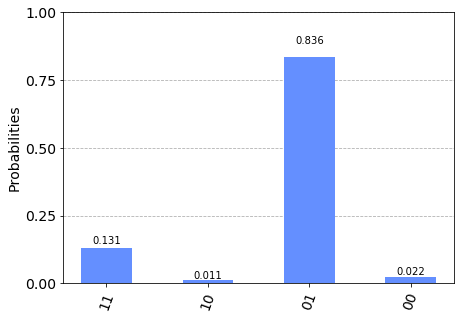

In [6]:
plot_histogram(counts,sort='desc')